<a href="https://colab.research.google.com/github/everestso/61.67.71.73..18.19.20.21/blob/master/c174f19tree2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline
# Important for using matplotlib w/ Ipython Notebook
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import graphviz as gv

import random
import numpy as np

import sys
import os

In [0]:
class Tree:
  pass

class Node:
  def __init__(self, key):
    self.p=None;
    self.key = key
    self.left = None
    self.right = None
    
def TreeInsert(T, z):
  y=None
  x=T.root
  while (x != None):
    y = x
    if z.key < x.key:
      x = x.left
    else:
      x = x.right
  z.p = y
  if y==None:
    T.root = z
  elif z.key < y.key:
    y.left = z
  else:
    y.right = z
    
def InorderTreeWalk(x):
  if x!=None:
    InorderTreeWalk(x.left)
    print (x.key, end=" " )
    InorderTreeWalk(x.right)
    

In [27]:
T = Tree()
T.root = None

data = list(range(20))
random.shuffle(data)
print(data)

for i in data:
  z = Node(i)
  TreeInsert(T,z)

InorderTreeWalk(T.root)

[4, 11, 13, 12, 3, 9, 10, 19, 15, 2, 17, 18, 6, 0, 1, 8, 5, 7, 16, 14]
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 

In [0]:
def DisplayTreeWalk(G, x):
  if x!=None:
    if x.left != None:
      G.node(str(x.left.key))
      G.edge(str(x.key),str(x.left.key), label = '', color='blue')
      DisplayTreeWalk(G, x.left)
    else:
      G.nilCount += 1
      G.node(str(-1*G.nilCount), label = "nil")
      G.edge(str(x.key),str(-1*G.nilCount), label = '', color='blue')
   
    if x.right != None:
      G.node(str(x.right.key))
      G.edge(str(x.key),str(x.right.key), label = '', color='red')
      DisplayTreeWalk(G, x.right)
    else:
      G.nilCount += 1
      G.node(str(-1*G.nilCount), label = "nil")
      G.edge(str(x.key),str(-1*G.nilCount), label = '', color='red')
    
def DisplayTree(T):
    'Plots a tree'
    G = gv.Graph(filename='graph', format='png')
    G.nilCount = 0
    G.node(str(T.root.key))
    DisplayTreeWalk(G, T.root, )
    
    G.render()
    img=mpimg.imread('graph.png')

    fig, ax = plt.subplots(frameon=False)
    fig.set_size_inches(7,7)
    imgplot = plt.imshow(img)

    ax.axis('off')
    plt.box(on=None) 
    plt.show()  

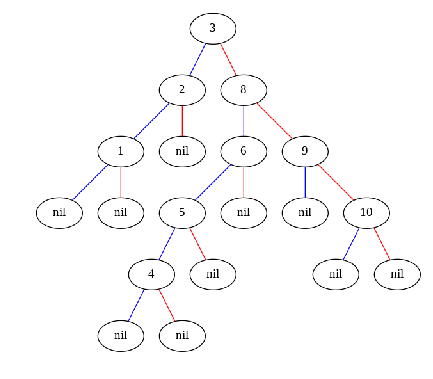

In [59]:
DisplayTree(T)

[2, 6, 3, 9, 8, 10, 4, 1, 7, 5]


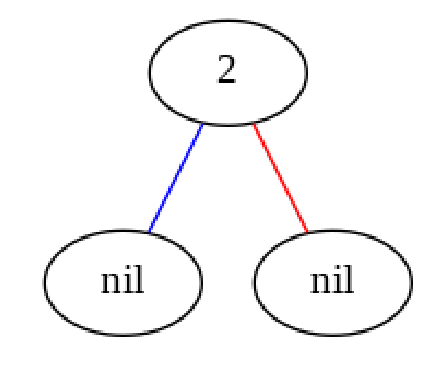

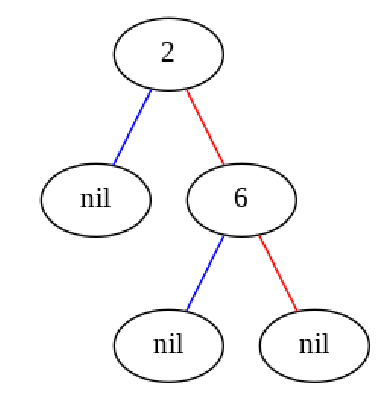

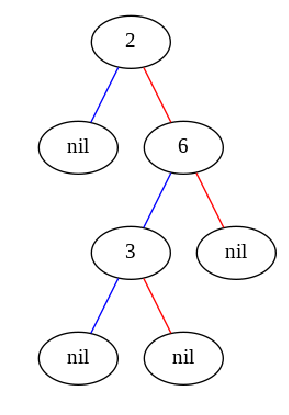

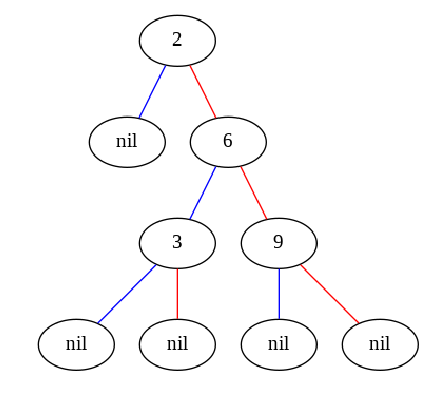

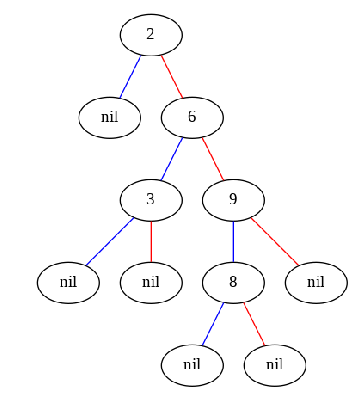

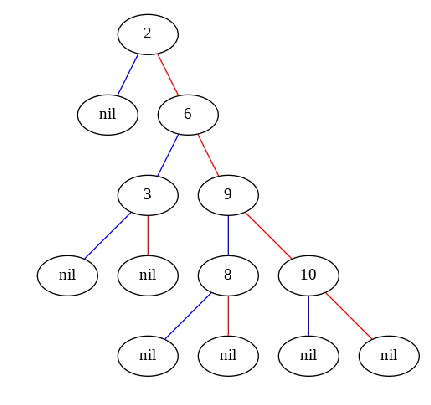

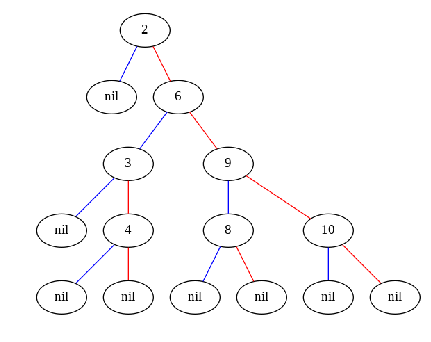

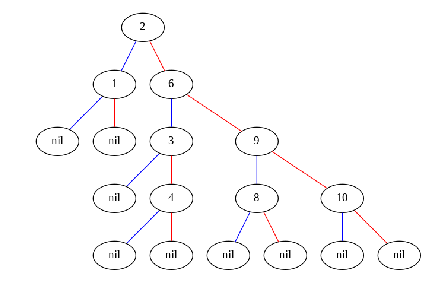

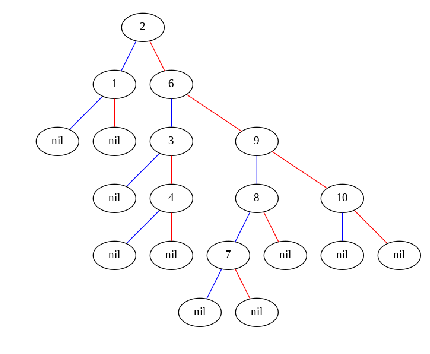

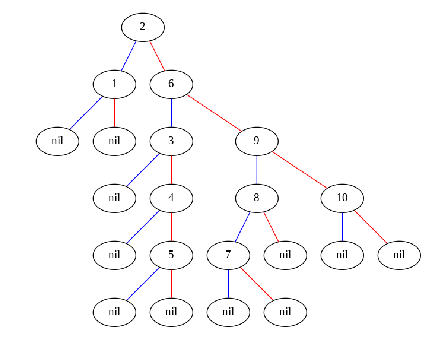

In [60]:
T = Tree()
T.root = None

data = list(range(1, 11))
random.shuffle(data)
print(data)

for i in data:
  z = Node(i)
  TreeInsert(T,z)
  DisplayTree(T)

 

In [0]:
def TreeSearch(x, k):
  if x==None or x.key == k:
    return x
  if k < x.key:
    return TreeSearch(x.left, k)
  else:
    return TreeSearch(x.right, k)
  


In [62]:
z = TreeSearch(T.root, 7)
print (z.key, z.p.key)

7 8


In [0]:
def Transplant(T, u, v):
  if u.p == None:
    T.root = v
  elif (u == u.p.left):
    u.p.left = v
  else:
    u.p.right = v
  if (v != None):
    v.p = u.p
    
def TreeMin(x):
  while (x.left != None):
    x = x.left
  return x

def TreeDelete(T, z):
  if (z.left == None):
    Transplant(T, z, z.right)
  elif (z.right == None):
    Transplant(T, z, z.left)
  else:
    y = TreeMin(z.right)
    if (y.p != z):
      Transplant(T, y, y.right)
      y.right = z.right
      y.right.p = y
    Transplant(T, z, y)
    y.left = z.left
    y.left.p = y
  

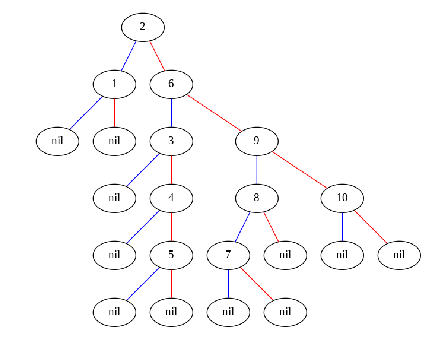

In [64]:
DisplayTree(T)


6 2


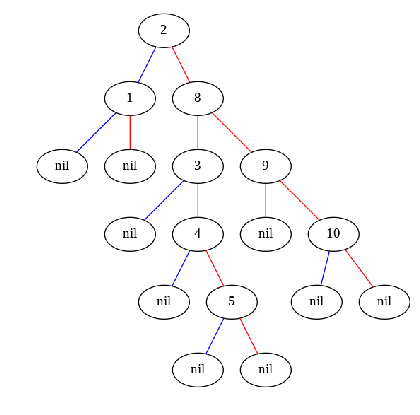

In [67]:
z = TreeSearch(T.root,6)
print (z.key, z.p.key)

TreeDelete(T, z)
DisplayTree(T)


In [68]:
InorderTreeWalk(T.root)

1 2 3 4 5 8 9 10 